<div style="text-align:left;">
  <a href="https://code213.tech/" target="_blank">
    <img src="../images/code213.PNG" alt="QWorld">
  </a>
  <p><em>prepared by Latreche Sara</em></p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# set random see insure reproductibility
np.random.seed(0)

In [3]:
# dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length= np.random.normal(loc=5, scale=1,size=10)
dogs_ear_flappiness_index= np.random.normal(loc=8, scale=1,size=10)

In [4]:
# cats: lower ear flappiness index, higher whisker length
cats_whisker_length= np.random.normal(loc=8, scale=1,size=10)
cats_ear_flappiness_index= np.random.normal(loc=5, scale=1,size=10)

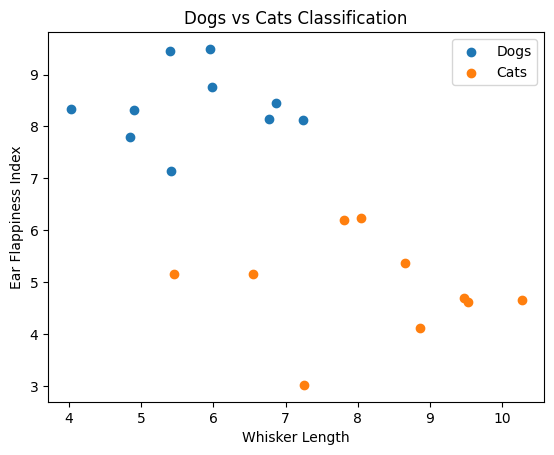

In [5]:
# plot the data points
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification')
plt.legend()
plt.show()

In [49]:
# implementing a random linear classifier algorithm
def random_linear_classifier(data_dogs,data_cats,k,d):
  # d is the number of features
  best_error = float('inf')
  best_theta = None
  best_theta0 = None

  for _ in range(k):
    theta = np.random.normal(size=d)
    theta0 = np.random.normal()

    error = compute_error(data_dogs,data_cats,theta,theta0) # Fixed: Removed extra indentation

    if error < best_error:
      best_error = error
      best_theta = theta
      best_theta0 = theta0
  return best_theta,best_theta0

In [50]:
def compute_error(data_dogs,data_cats,theta,theta0):
  error=0
  for x_dog in data_dogs:
    if np.dot(theta,x_dog)+theta0<=0:
      error +=1
  for x_cat in data_cats:
    if np.dot(theta,x_cat)+theta0>0:
      error +=1
  return error

In [51]:
# prepare data for algorithm
dogs_data=np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

In [44]:
dogs_data

array([[2.44701018, 8.15494743],
       [5.6536186 , 8.37816252],
       [5.8644362 , 7.11221425],
       [4.25783498, 6.01920353],
       [7.26975462, 7.65208785],
       [3.54563433, 8.15634897],
       [5.04575852, 9.23029068],
       [4.81281615, 9.20237985],
       [6.53277921, 7.61267318],
       [6.46935877, 7.69769725]])

In [25]:
cats_data

array([[6.95144703, 4.10453344],
       [6.57998206, 5.3869025 ],
       [6.29372981, 4.48919486],
       [9.9507754 , 3.81936782],
       [7.49034782, 4.97181777],
       [7.5619257 , 5.42833187],
       [6.74720464, 5.06651722],
       [8.77749036, 5.3024719 ],
       [6.38610215, 4.36567791],
       [7.78725972, 4.63725883]])

In [52]:
# run random linear classifier algorithms
k=100
d=2
best_theta,best_theta0=random_linear_classifier(dogs_data,cats_data,k,d)

In [53]:
# plot the decision bouandry
x_vals=np.linspace(2,10,100)
y_vals=(-best_theta[0]/best_theta[1])*x_vals-(best_theta0/best_theta[1])

In [36]:
best_theta0

-0.9072983643832422

In [37]:
# print best theta theta1 and theta 2
best_theta

array([-1.63019835,  0.46278226])

<function matplotlib.pyplot.show(close=None, block=None)>

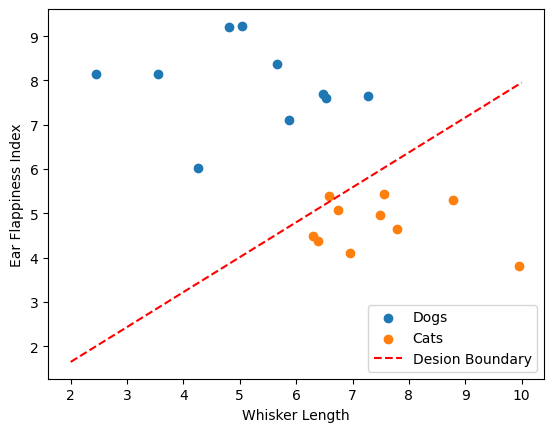

In [54]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='Cats')
plt.plot(x_vals,y_vals,color='red',linestyle='--',label='Desion Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')

# Set the limits of the x and y axes
#plt.xlim(0)  # Start x-axis at 0
#plt.ylim(0)  # Start y-axis at 0
plt.legend()
plt.show